## EE 242 Lab 3b – Frequency Domain Representation of Signals - Fourier Transform

**Aidan, Keit, Chinmay, Andrew** 

This lab has 2 exercises to be completed as a team. Each should be given a separate code cell in your Notebook, followed by a markdown cell with report discussion. Your notebook should start with a markdown title and overview cell, which should be followed by an import cell that has the import statements for all assignments. For this assignment, you will need to import: numpy, the wavfile package from scipy.io, simpleaudio/librosa, and matplotlib.pyplot.  

In [5]:
# We'll refer to this as the "import cell." Every module you import should be imported here.
%matplotlib inline
import numpy as np
import matplotlib
import scipy.signal as sig
import matplotlib.pyplot as plt
from scipy.io import wavfile as wav
from IPython.display import Audio
execfile("../utils.py")
# import whatever other modules you use in this lab -- there are more that you need than we've included 

## Summary

In this lab, we will learn how to transform signals from the time domain to the frequency domain. The concepts we’ll focus on include using a discrete implementation of the Fourier Transform (DFT) with a digitized signal and understanding the relationship between the discrete DFT index k and frequency
ω for both the original continuous signal x(t). This is a one-week lab. 

## Lab 3b turn in checklist

•	Lab 3b Jupyter notebook with code for the 2 exercises assignment in separate cells. Each assignment cell should contain markdown cells (same as lab overview cells) for the responses to lab report questions. Include your lab members’ names at the top of the notebook.

**Please submit the report as PDF** 




## Assignment 3 -- Analyzing frequency content of a signal

For this assignment, you will use a discrete Fourier transform (specifically, the Python implementation of an FFT) to analyze the frequency content of the 100ms segment of the horn signal (from 200ms to 300ms) from assignment 3A. Because this is a periodic signal, the frequency content will have spikes, but because it is a discrete-time signal, they will have finite height. You will experiment with different FFT sizes and different plotting options. The description below assumes that you import numpy as np.

**A.** Use the np.fft.fft function to compute the FFT for the 100 ms horn signal, with an fft size of nfft=1024, which you can call **x_f**. Recall that the result of the FFT will be a vector that spans frequencies [0,$f_s$]. If this is a real-valued signal, then the first half of the FFT matters: [0,nfft/2]. **x_f** is not returned in the desired order so in order to get both the positive and negative frequencies, you need to use the np.fft.fftshift function to get **x_f2**. Create two different plots of the magnitude of result using **(np.abs(.))** in a 2x1 view: one with positive and negative frequencies and one with just positive frequencies. Be sure to scale the magnitude according to time signal window length $f_s$ and signal duration. Label the frequency axis in terms of Hz by creating a vector **freq** that scales the FFT index by $f_s$/nfft. 

**B.** It is often the case that frequency content is plotted on a log scale. Plot the one-sided (positive frequency) magnitude using using a log scale.

**C.**  Changing the size of the FFT will change the frequency resolution, but it also changes the shape of the result a bit. Just as we saw with Gibbs phenomenon where increasing the number of Fourier series coefficients gave a high frequency ringing at sharp edges, increasing the FFT window will give a “ringing” effect for sharp peaks in frequency. To see this effect, compute the FFT using nfft=2048 and plot the log magnitude only using positive frequencies. Compare to your plot from Part B. The effect is easier to see on a log scale. 

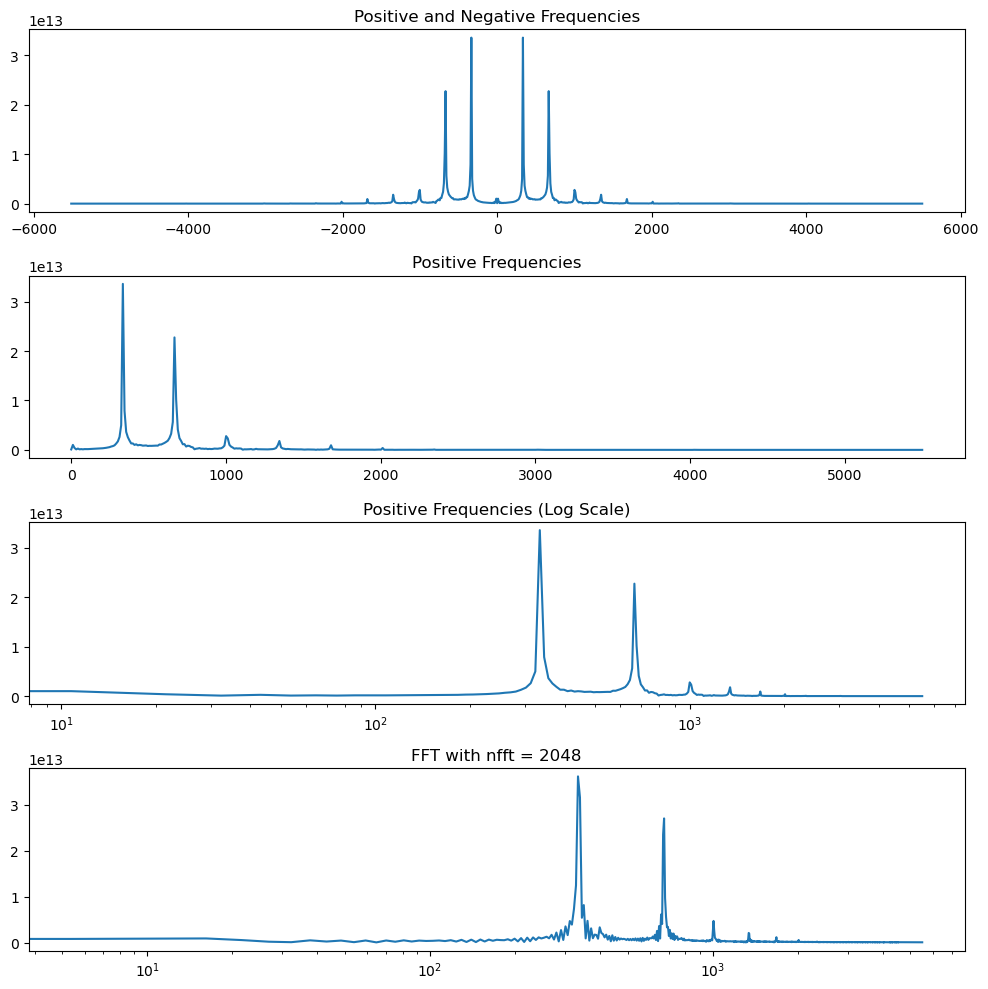

In [16]:
# Assignment 3 - Analyzing frequency content of a signal

# Part A - Using python FFT function
# Use the np.fft.ftt function to find the fourier domain representation of the horn signal
# Use the np.fft.fftshift to find the shifted fft
# Plot and see the positive and negative frequencies (remember to scale the FFT index by fs/nfft and magnitude by fs*signal_duration)
    # Seperate out the positive part into another vector
    # Plot the seperated signal

# read signal
sampleRate, data = wav.read('./horn11short.wav')
start_index = int(sampleRate * 0.2)
end_index = int(sampleRate * 0.3)

nfft = 1024
x_f = np.fft.fft(data[start_index:end_index], nfft)
x_f2 = np.fft.fftshift(x_f)

freq = np.fft.fftshift(np.fft.fftfreq(len(x_f2), 1 / sampleRate))
magnitude = np.abs(x_f2) * (sampleRate * (end_index - start_index))

plt.figure(figsize=(10, 10))

plt.subplot(4, 1, 1)
plt.plot(freq, magnitude)
plt.title('Positive and Negative Frequencies')

plt.subplot(4, 1, 2)
plt.plot(freq[freq >= 0], magnitude[freq >= 0])
plt.title('Positive Frequencies')

# Part B - Plot the FFT across frequency
# Repeat the process for plotting the positive frequencies
# Use the following to change your x-axis to logscale and plot in parallel ----- matplotlib.pyplot.xscale(value, **kwargs)
plt.subplot(4, 1, 3)
plt.plot(freq[freq >= 0], magnitude[freq >= 0])
plt.title('Positive Frequencies (Log Scale)')
plt.xscale('log')

# Part C - Horn Signal Ringing effect.
# Do the same things as Part A but with nfft = 2048
# Plot the the signal (positive frequencies only) and observe the additional ringing -- compare with Part B
x_f3 = np.fft.fft(data[start_index:end_index], 2048)
x_f3 = np.fft.fftshift(x_f3)
freq3 = np.fft.fftshift(np.fft.fftfreq(len(x_f3), 1 / sampleRate))
x_f3_magnitude = np.abs(x_f3) * (sampleRate * (end_index - start_index))

plt.subplot(4, 1, 4)
plt.plot(freq3[freq3 >= 0], x_f3_magnitude[freq3 >= 0])
plt.xscale('log')
plt.title('FFT with nfft = 2048')

plt.tight_layout()



###  Discussion

In assignment 3, we used specific cosine frequencies to approximate the horn note,
assuming the signal is periodic so the harmonics have non-zero energy. The FFT results show a different picture, and the synthesized version is easily distinguished from the original. Discuss reasons for these differences.

## Assignment 4 -- Comparing frequency content of a signal

Many interesting time signals have changing frequency content. Music is one example, since different notes have different fundamental frequency. Speech is another example: we distinguish different vowels and consonants based on their frequency content. In this assignment, you will use the FFT to compare the frequency content of two different speech sounds in a sentence. We’ll use 30ms windows, where the frequency content is relatively stable.

**A.**  Download the signal "bluenose3.wav", and read in the file. Plot the full waveform, using the sampling frequency to correctly label the time axis. Play the file.

**B.**  Extract the samples corresponding to times [0.75,0.78]. (This corresponds to the “oo” sound in the word “grew.”) Using a 2x1 plot, plot the time waveform (labeling the time axis with the specified time region) and the magnitude of the frequency response (positive frequencies only, labeling the frequency axis in Hz).

**C.**  Repeat the exercise above using the samples corresponding to times [2.565,2.595]. (This corresponds to the “s” sound.)


bluenose3.wav:


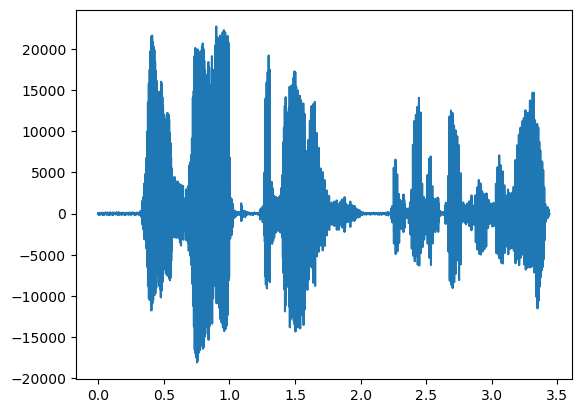

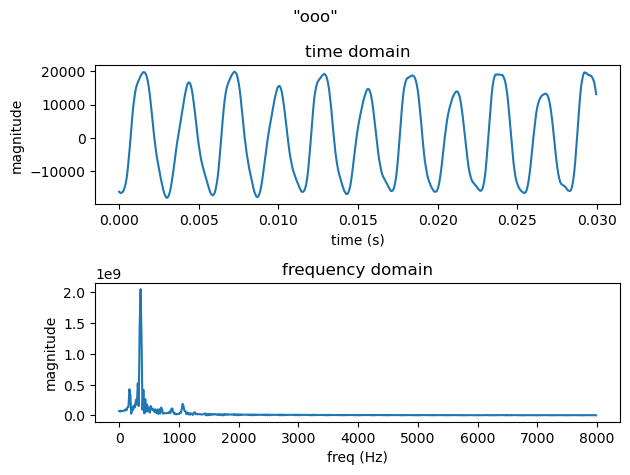

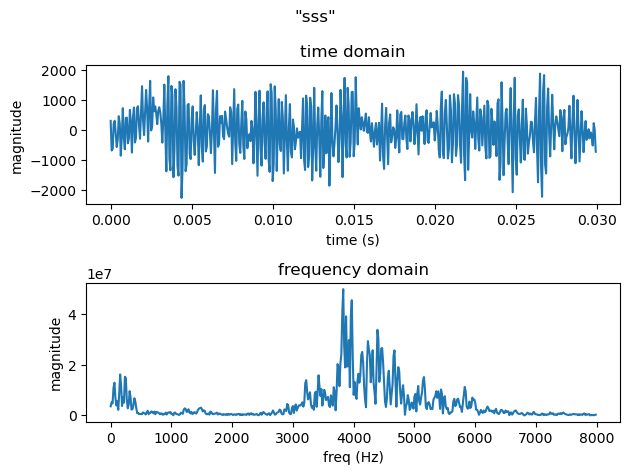

In [21]:
# Assignment 4 - Comparing frequency content of a signal

# Part A - Reading, plotting and playing the bluenose3.wav file
file = wav.read('bluenose3.wav')
fs = file[0]
play_file('bluenose3.wav')
plt.figure()
plt.plot(np.arange(len(file[1]))/fs, file[1])

# Part B - Extracting ooo part of the signal
# Extract the ooo part of the signal from 0.75 seconds to 0.78 seconds
# Plot the signal in time and frequency domain

def plot_time_freq(signal, sampling_frequency, start_time, end_time, title='', nfft=1024):
    sig_y = signal[int(start_time*sampling_frequency):int(end_time*sampling_frequency)]
    sig_t = np.arange(len(sig_y))/sampling_frequency

    fig, axs = plt.subplots(2, 1)
    axs[0].plot(sig_t, sig_y)
    axs[0].set_title('time domain')
    axs[0].set_xlabel('time (s)')
    axs[0].set_ylabel('magnitude')

    sig_f = np.fft.fft(sig_y, nfft)
    sig_f2 = np.fft.fftshift(sig_f)

    freq = np.fft.fftshift(np.fft.fftfreq(len(sig_f2), 1 / sampling_frequency))
    magnitude = np.abs(sig_f2) * (sampling_frequency * (end_time - start_time))

    axs[1].plot(freq[freq >= 0], magnitude[freq >= 0])
    axs[1].set_title('frequency domain')
    axs[1].set_xlabel('freq (Hz)')
    axs[1].set_ylabel('magnitude')
    fig.suptitle(title)
    fig.tight_layout()

plot_time_freq(file[1], fs, 0.75, 0.78, title='"ooo"', nfft=1024)

# Part C - Extracting sss part of the signal
# Extract the sss part of the signal from 2.565 seconds to 2.595 seconds
# Plot the signal in time and frequency domain

plot_time_freq(file[1], fs, 2.565, 2.595, title='"sss"', nfft=1024)

# Part D - Justify the difference and choice of nfft used.


###  Discussion

State what size FFT you used and explain your choice. Comment on the differences between the time and frequency plots for the two segments and the auditory differences.